there are data set from different system and different years. first we merge 2 dataset each year from Mark43 system(2019~2022) base on the same field contact number, and then merge all mark43 data. we will replace all duplicates base on the fc number

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load Mark43 datasets
fieldcontact_2019 = pd.read_csv('mark43_fieldcontacts_for_public_20192.csv')
fieldcontact_name_2019 = pd.read_csv('mark43_fieldcontacts_name_for_public_2019.csv')

fieldcontact_2020 = pd.read_csv('mark43_fieldcontacts_for_public_2020_202104151551.csv')
fieldcontact_name_2020 = pd.read_csv('mark43_fieldcontacts_name_for_public_2020_202104151551.csv')

fieldcontact_2021 = pd.read_csv('fio_2021-2.csv')
fieldcontact_name_2021 = pd.read_csv('fio_names_2021.csv')

fieldcontact_2022 = pd.read_csv('fio-records-2022-mark43-fieldcontact-table.csv')
fieldcontact_name_2022 = pd.read_csv('fio-records-2022-mark43-fieldcontact_name-table.csv')

# Merge FieldContact and FieldContact_Name for each year
merged_2019 = pd.merge(fieldcontact_2019, fieldcontact_name_2019, on='fc_num', how='left')
merged_2020 = pd.merge(fieldcontact_2020, fieldcontact_name_2020, on='fc_num', how='left')
merged_2021 = pd.merge(fieldcontact_2021, fieldcontact_name_2021, on='fc_num', how='left')
merged_2022 = pd.merge(fieldcontact_2022, fieldcontact_name_2022, on='fc_num', how='left')

# Concatenate Mark43 datasets for 2019-2022
mark43_data = pd.concat([merged_2019, merged_2020, merged_2021, merged_2022], ignore_index=True)

# Standardize column names to lowercase for consistency
mark43_data.columns = mark43_data.columns.str.lower()

# Handle NULL values
mark43_data = mark43_data.replace('NULL', pd.NA)

# Basic data exploration
print(mark43_data.head())
print(mark43_data.describe())

# Check for duplicates
duplicates = mark43_data.duplicated()
if duplicates.sum() > 0:
    print(f"Found {duplicates.sum()} duplicate rows!")
    mark43_data = mark43_data.drop_duplicates()

# Save the merged dataset to a new CSV file
mark43_data.to_csv('merged_Mark43_data.csv', index=False)


       fc_num       contact_date_x contact_officer contact_officer_name  \
0  FC19000002   2019-09-29 9:00:00          131227       TAYLOR, KIMBER   
1  FC19000003  2019-09-29 10:21:00           62601           LEE, ELLYS   
2  FC19000010  2019-09-29 20:25:00           86221           LAI, THUAN   
3  FC19000014  2019-09-29 18:00:00          153120       O'LEARY, KEVIN   
4  FC19000014  2019-09-29 18:00:00          153120       O'LEARY, KEVIN   

   supervisor   supervisor_name          street        city state   zip  ...  \
0    106714.0     SHANA COTTONE     ARCHDALE RD  ROSLINDALE    MA  2131  ...   
1     75661.0   JUANA HERNANDEZ  MALCOLM X BLVD      BOSTON    MA  2120  ...   
2     11180.0  PATRICK MORRISON    TONAWANDA ST      BOSTON    MA  2124  ...   
3      9035.0       KEVIN POWER      TROTTER CT      BOSTON    MA  2118  ...   
4      9035.0       KEVIN POWER      TROTTER CT      BOSTON    MA  2118  ...   

   skin_tone               ethnicity otherclothing  deceased license

then we merge all data from New RMS sence 2015 to 2018

In [5]:
fieldcontact_2015 = pd.read_csv('8119eb8d-6ee8-412d-a45d-53c367a98cea.csv')
fieldcontact_name_2015 = pd.read_csv('34453828-67ca-45f1-a31d-526b11ca49f4.csv')

fieldcontact_2016 = pd.read_csv('35f3fb8f-4a01-4242-9758-f664e7ead125.csv')
fieldcontact_name_2016 = pd.read_csv('ebb9c51c-6e9a-40a4-94d0-895de9bf47ad.csv')

fieldcontact_2017 = pd.read_csv('c72b9288-2658-4e6a-9686-ffdcacb585e7.csv')
fieldcontact_name_2017 = pd.read_csv('f18a0632-46ea-4032-9749-f5b50cf7b865.csv')

fieldcontact_2018 = pd.read_csv('ee4f1175-54b6-4d06-bceb-26d349118e25.csv')
fieldcontact_name_2018 = pd.read_csv('aa46b3ad-1526-4551-9f0f-6dbdfbb429c0.csv')

fieldcontact_2019RMS = pd.read_csv('35cfa498-cb10-43da-b8b2-948a66e48f26.csv')
fieldcontact_name_2019RMS = pd.read_csv('b102d3a4-8b44-443e-bc09-00c44974c3b1.csv')


# Merge FieldContact and FieldContact_Name for each year
merged_2015 = pd.merge(fieldcontact_2015, fieldcontact_name_2015, on='fc_num', how='left')
merged_2016 = pd.merge(fieldcontact_2016, fieldcontact_name_2016, on='fc_num', how='left')
merged_2017 = pd.merge(fieldcontact_2017, fieldcontact_name_2017, on='fc_num', how='left')
merged_2018 = pd.merge(fieldcontact_2018, fieldcontact_name_2018, on='fc_num', how='left')
merged_2019RMS = pd.merge(fieldcontact_2019RMS, fieldcontact_name_2019RMS, on='fc_num', how='left')

# Concatenate New RMS datasets for 2015-2019
New_RMS_data = pd.concat([merged_2015, merged_2016, merged_2017, merged_2018, merged_2019RMS], ignore_index=True)

# Standardize column names to lowercase for consistency
New_RMS_data.columns = New_RMS_data.columns.str.lower()

# Handle NULL values
New_RMS_data = New_RMS_data.replace('NULL', pd.NA)

# Basic data exploration
print(New_RMS_data.head())
print(New_RMS_data.describe())

# Check for duplicates
duplicates = New_RMS_data.duplicated()
if duplicates.sum() > 0:
    print(f"Found {duplicates.sum()} duplicate rows!")
    New_RMS_data = New_RMS_data.drop_duplicates()

# Save the merged dataset to a new CSV file
New_RMS_data.to_csv('merged_New_RMS_data.csv', index=False)


       fc_num       contact_date_x contact_officer    contact_officer_name  \
0  F150003753  2015-06-29T09:34:00          093858   POWERS,MICHAEL 093858   
1  F150003754  2015-06-29T09:34:00          086206  WOZNIAK,CRAIG 086206 A   
2  F160015832  2015-08-24T14:05:00          099822           ALVES,JOHN F.   
3  F150009836  2015-11-14T00:00:00          062253           RUSSO,DEREK L   
4  F150007459  2015-10-14T21:10:00          107106        O'LOUGHLIN,JAMES   

   supervisor   supervisor_name         streetaddr           city state  \
0        9600  PIEROWAY, ROBERT       DEWEY SQUARE         BOSTON    MA   
1        9600  PIEROWAY, ROBERT       DEWEY SQUARE         BOSTON    MA   
2       11612       HYNES, JOHN  00 LEYLAND STREET  JAMAICA PLAIN    MA   
3       11596     DALY, CHARLES     65 MAVERICK SQ    EAST BOSTON    MA   
4       12283  TARANTINO, JAMES   60 MCGREEVEY WAY        ROXBURY    MA   

     zip  ...       contact_date_y     sex     race   age   build hair_style  \


get all the information we need


In [7]:
import numpy as np
mark43_data= pd.read_csv('merged_Mark43_data.csv')
new_rms_data= pd.read_csv('merged_New_RMS_data.csv')
old_rms_data= pd.read_csv('boston-police-department-fio.csv')

mark43_relevant_columns = ['fc_num', 'contact_date_x', 'contact_officer', 'contact_officer_name', 'supervisor','supervisor_name',  'stop_duration', 'circumstance', 'basis','city']
new_rms_relevant_columns = ['fc_num', 'contact_date_x', 'contact_officer', 'contact_officer_name', 'supervisor','supervisor_name',  'stop_duration', 'circumstance', 'basis','city']
old_rms_relevant_columns = ['FIO_ID', 'FIO_DATE', 'OFFICER_ID', 'OFFICER', 'SUPERVISOR_ID','SUPERVISOR', 'BASIS','CITY']

mark43_selected = mark43_data[mark43_relevant_columns]
new_rms_selected = new_rms_data[new_rms_relevant_columns]
old_rms_selected = old_rms_data[old_rms_relevant_columns]

old_rms_selected = old_rms_selected.rename(columns={
    'FIO_ID': 'fc_num',
    'FIO_DATE': 'contact_date_x',
    'OFFICER_ID': 'contact_officer',
    'OFFICER': 'contact_officer_name',
    'SUPERVISOR_ID': 'supervisor',
    'SUPERVISOR': 'supervisor_name',
    'BASIS': 'basis',
    'CITY': 'city'
})
old_rms_selected['stop_duration'] = np.nan
old_rms_selected['circumstance'] = np.nan

combined_data = pd.concat([mark43_selected, new_rms_selected, old_rms_selected], axis=0, ignore_index=True)


# Remove duplicates based on 'fc_num'
combined_data.drop_duplicates(subset='fc_num', keep='first', inplace=True)

# Overwrite the original CSV file with the cleaned data
combined_data.to_csv('combined_data.csv', index=False)




C:\Users\yangc\AppData\Local\Temp\ipykernel_16116\2270061926.py:2: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  mark43_data= pd.read_csv('merged_Mark43_data.csv')
C:\Users\yangc\AppData\Local\Temp\ipykernel_16116\2270061926.py:3: DtypeWarning: Columns (2,6,9,35) have mixed types. Specify dtype option on import or set low_memory=False.
  new_rms_data= pd.read_csv('merged_New_RMS_data.csv')


In [2]:
# Count the total number of cases
combined_data = pd.read_csv('combined_data.csv')
total_cases = combined_data.shape[0]

print(f"Total number of cases: {total_cases}")


Total number of cases: 211522


C:\Users\yangc\AppData\Local\Temp\ipykernel_7732\3127491150.py:2: DtypeWarning: Columns (0,2,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('combined_data.csv')


start to evaluate the data.
first we evaluate number of records per officer ID

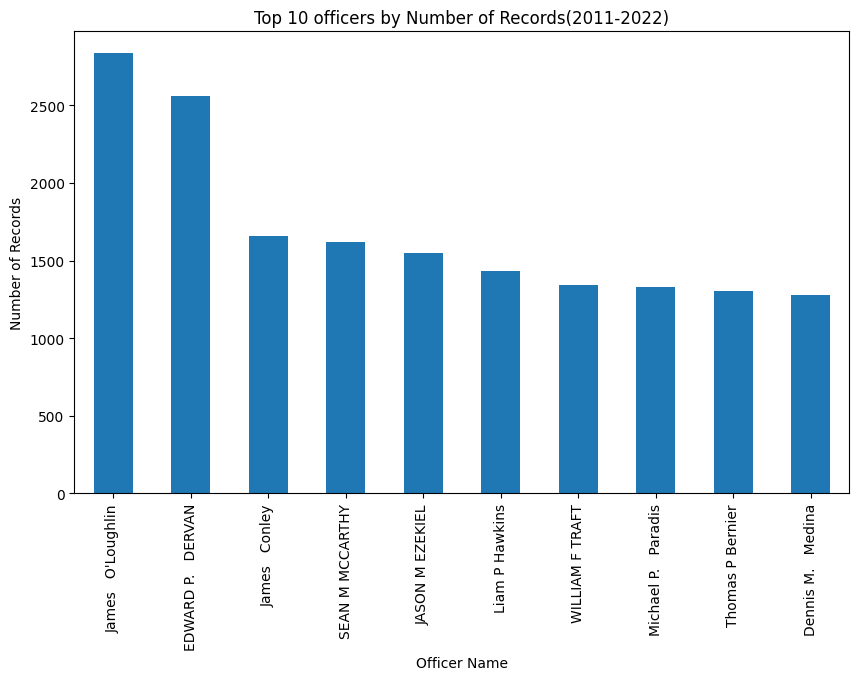

In [3]:
import matplotlib.pyplot as plt
# Number of Records per Officer ID
officer_id_counts = combined_data['contact_officer'].value_counts()


officer_id_to_name = dict(zip(combined_data['contact_officer'], combined_data['contact_officer_name']))

# Get top 10 officer IDs
top_10_officer_ids = officer_id_counts.head(10).index

# Map the top 10 officer IDs to their names
top_10_officer_names = top_10_officer_ids.map(officer_id_to_name)

# Now plot using these names
plt.figure(figsize=(10, 6))
officer_id_counts.head(10).rename(index=dict(zip(top_10_officer_ids, top_10_officer_names))).plot(kind='bar')
plt.title('Top 10 officers by Number of Records(2011-2022)')
plt.ylabel('Number of Records')
plt.xlabel('Officer Name')
plt.show()

do the same for the supervisor

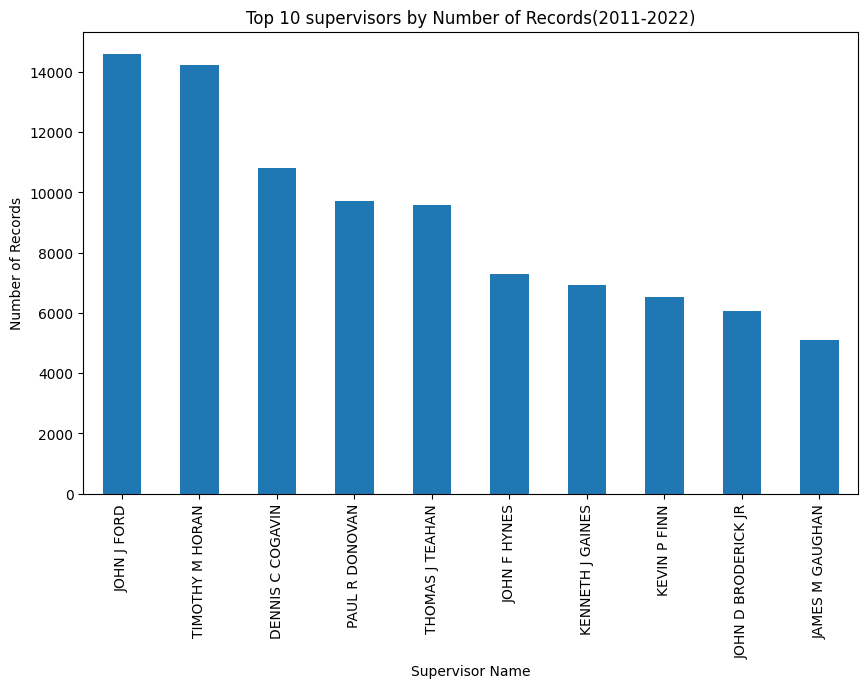

In [10]:

supervisor_id_counts = combined_data['supervisor'].value_counts()
# Creating a unique mapping of supervisor ID to supervisor name
unique_supervisor_data = combined_data.drop_duplicates(subset=['supervisor', 'supervisor_name'])
supervisor_id_to_name = dict(zip(unique_supervisor_data['supervisor'], unique_supervisor_data['supervisor_name']))

# Get top 10 supervisor IDs
top_10_supervisor_ids = supervisor_id_counts.head(10).index

# Map the top 10 supervisor IDs to their names
top_10_supervisor_names = top_10_supervisor_ids.map(supervisor_id_to_name)

# Now plot using these names
plt.figure(figsize=(10, 6))
supervisor_id_counts.head(10).rename(index=dict(zip(top_10_supervisor_ids, top_10_supervisor_names))).plot(kind='bar')
plt.title('Top 10 supervisors by Number of Records(2011-2022)')
plt.ylabel('Number of Records')
plt.xlabel('Supervisor Name')
plt.show()



make the duration time to the same format.

In [12]:
mapping = {
    'Less Than Five Minutes': 5,
    'Five to Ten Minutes': 10,
    'Ten to Fifteen Minutes': 15,
    'Fifteen to Twenty Minutes': 20,
    'Twenty to Twenty-Five Minutes': 25,
    'Twenty-Five to Thirty Minutes': 30,
    'Thirty to Forty-Five Minutes': 45,
    'Forty-Five to Sixty Minutes': 60,
    'One to Two Hours': 120,
    'Longer Than Two Hours': 240  
}
combined_data['stop_duration'] = combined_data['stop_duration'].replace(mapping)
combined_data['stop_duration'] = pd.to_numeric(combined_data['stop_duration'], errors='coerce')





filter the data with non empty stop duration and find the average time

In [20]:
non_empty_durations = combined_data[combined_data['stop_duration'].notna()]

# Compute the number of non-empty cases
num_cases = len(non_empty_durations)

# Compute the average stop duration
average_duration = non_empty_durations['stop_duration'].mean()

print(f"Number of cases with non-empty stop_duration: {num_cases}")
print(f"Average stop_duration: {average_duration:.2f} minutes")


Number of cases with non-empty stop_duration: 37810
Average stop_duration: 50.28 minutes


In [34]:
print(non_empty_durations['stop_duration'].describe())



count     37810.00000
mean         50.27818
std        2187.32763
min           1.00000
25%          10.00000
50%          10.00000
75%          15.00000
max      389700.00000
Name: stop_duration, dtype: float64


we need to consider outliers as the min and max case are too extreme

In [35]:
non_empty_durations['stop_duration'] = pd.to_numeric(non_empty_durations['stop_duration'], errors='coerce')

# Drop any rows with non-numeric 'stop_duration'
non_empty_durations.dropna(subset=['stop_duration'], inplace=True)

df = non_empty_durations['stop_duration']

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df >= lower_bound) & (df <= upper_bound)]
print(df_filtered.describe())

count    33314.000000
mean        11.174971
std          4.489778
min          3.000000
25%         10.000000
50%         10.000000
75%         15.000000
max         22.000000
Name: stop_duration, dtype: float64


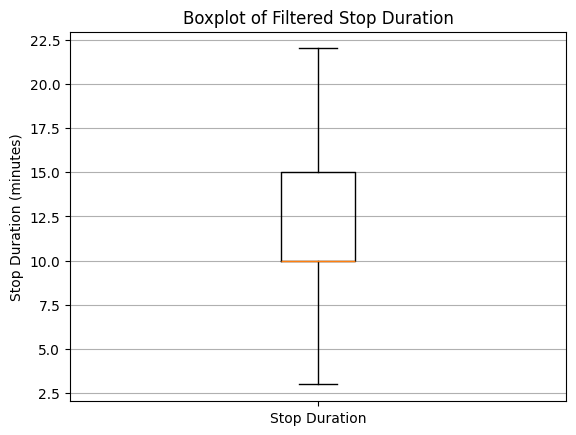

In [36]:
plt.boxplot(df_filtered)
plt.title('Boxplot of Filtered Stop Duration')
plt.ylabel('Stop Duration (minutes)')
plt.xticks([1], ['Stop Duration'])
plt.grid(axis='y')
plt.show()

In [15]:
import pandas as pd
from dateutil import parser

# Read the CSV file into a pandas DataFrame
combined_data = pd.read_csv('combined_data.csv')

# Function to parse a single date
def parse_date(date):
    try:
        return parser.parse(date)
    except (ValueError, TypeError):
        # Return None or pd.NaT if the date cannot be parsed
        return pd.NaT

# Apply the parsing function to the 'contact_date_x' column
combined_data['contact_date_x'] = combined_data['contact_date_x'].apply(parse_date)

# Checking the results
print(combined_data['contact_date_x'].head())


C:\Users\yangc\AppData\Local\Temp\ipykernel_7732\1863332987.py:5: DtypeWarning: Columns (0,2,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('combined_data.csv')


0    2019-09-29 09:00:00
1    2019-09-29 10:21:00
2    2019-09-29 20:25:00
3    2019-09-29 18:00:00
4    2019-09-30 10:32:00
Name: contact_date_x, dtype: object


In [16]:
import pandas as pd

# Assuming 'combined_data' is your DataFrame

# Convert 'contact_date_x' to datetime, errors='coerce' will handle unparseable formats by setting them to NaT
combined_data['contact_date_x'] = pd.to_datetime(combined_data['contact_date_x'], errors='coerce')

# Now extract year, month, day, and time
combined_data['year'] = combined_data['contact_date_x'].dt.year
combined_data['month'] = combined_data['contact_date_x'].dt.month
combined_data['day'] = combined_data['contact_date_x'].dt.day
combined_data['time'] = combined_data['contact_date_x'].dt.time

# Extracting additional components
combined_data['hour'] = combined_data['contact_date_x'].dt.hour
combined_data['minute'] = combined_data['contact_date_x'].dt.minute
combined_data['second'] = combined_data['contact_date_x'].dt.second

# Display the DataFrame to check the new columns
print(combined_data.head())



       fc_num      contact_date_x contact_officer contact_officer_name  \
0  FC19000002 2019-09-29 09:00:00          131227       TAYLOR, KIMBER   
1  FC19000003 2019-09-29 10:21:00           62601           LEE, ELLYS   
2  FC19000010 2019-09-29 20:25:00           86221           LAI, THUAN   
3  FC19000014 2019-09-29 18:00:00          153120       O'LEARY, KEVIN   
4  FC19000031 2019-09-30 10:32:00           97302        ROMANO, JASON   

   supervisor   supervisor_name stop_duration circumstance  \
0    106714.0     SHANA COTTONE          60.0  Encountered   
1     75661.0   JUANA HERNANDEZ           NaN  Encountered   
2     11180.0  PATRICK MORRISON           NaN     Observed   
3      9035.0       KEVIN POWER           0.0  Encountered   
4      9378.0    THOMAS O'LEARY           3.0  Encountered   

                  basis        city    year  month   day      time  hour  \
0             Encounter  ROSLINDALE  2019.0    9.0  29.0  09:00:00   9.0   
1                 Intel      B

year
1964.0        1
1967.0        3
1969.0        1
1971.0        2
1972.0        1
1973.0        1
1975.0        1
1979.0        1
1980.0        1
1984.0        2
1985.0        2
1986.0        4
1987.0        2
1988.0        2
1989.0        3
1990.0        3
1991.0        2
1992.0        1
1993.0        6
1994.0        4
1995.0        3
1996.0        2
1998.0        2
2001.0        2
2002.0        3
2003.0        9
2004.0        9
2005.0        3
2006.0       19
2007.0      161
2008.0      207
2009.0       43
2010.0      922
2011.0    35227
2012.0    38703
2013.0    33374
2014.0    34036
2015.0    18623
2016.0     9054
2017.0     8815
2018.0     8719
2019.0     8320
2020.0     5594
2021.0     4494
2022.0     5124
2023.0        1
2024.0        2
2030.0        2
2042.0        2
2044.0        3
dtype: int64


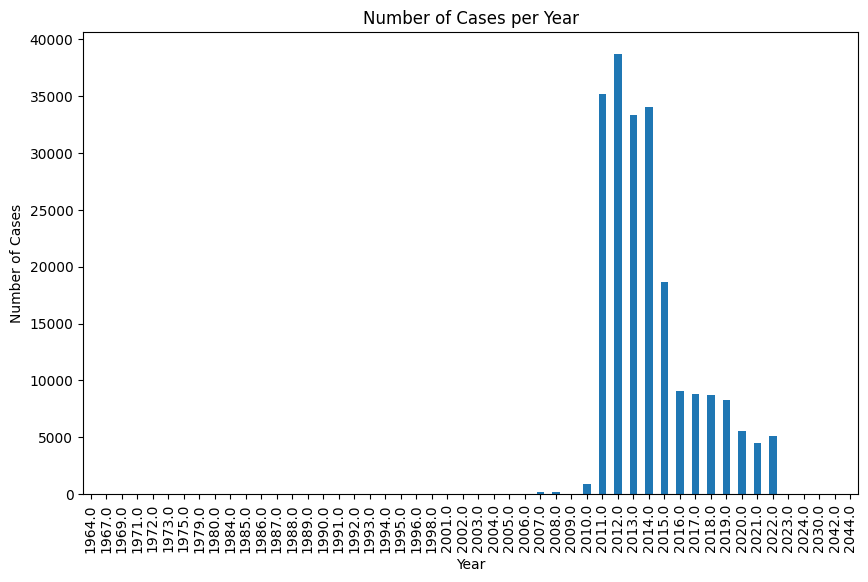

In [6]:
import pandas as pd

# Assuming 'combined_data' is your DataFrame and it includes the 'year' column you created earlier

# Group by year and count the number of cases per year
cases_per_year = combined_data.groupby('year').size()

# Display the result
print(cases_per_year)

# Plot the result
cases_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cases per Year')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.show()

In [7]:
# filter out rows with year outside the range 2011-2022
combined_data = combined_data[(combined_data['year'] >= 2011) & (combined_data['year'] <= 2022)]



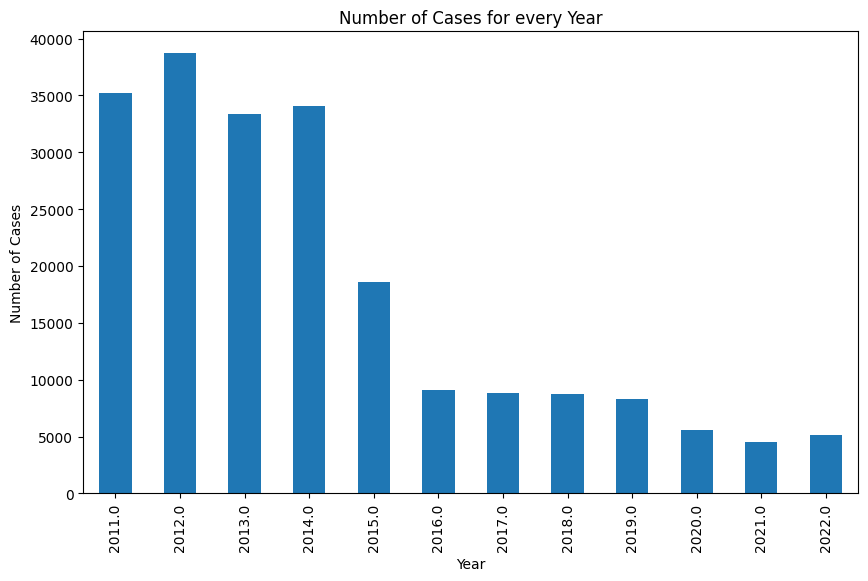

In [8]:
cases_per_year = combined_data.groupby('year').size()

# Plot the result
cases_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cases for every Year')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.show()

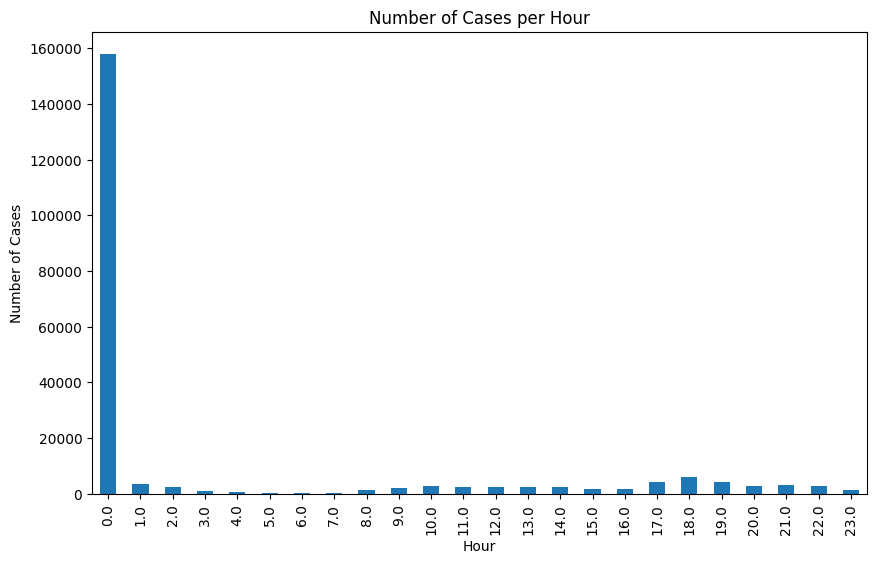

In [17]:
cases_per_hour = combined_data.groupby('hour').size()

# Plot the result
cases_per_hour.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cases per Hour')
plt.ylabel('Number of Cases')
plt.xlabel('Hour')
plt.show()


In [18]:
#drop rows with hour 0

combined_data = combined_data[combined_data['hour'] != 0]


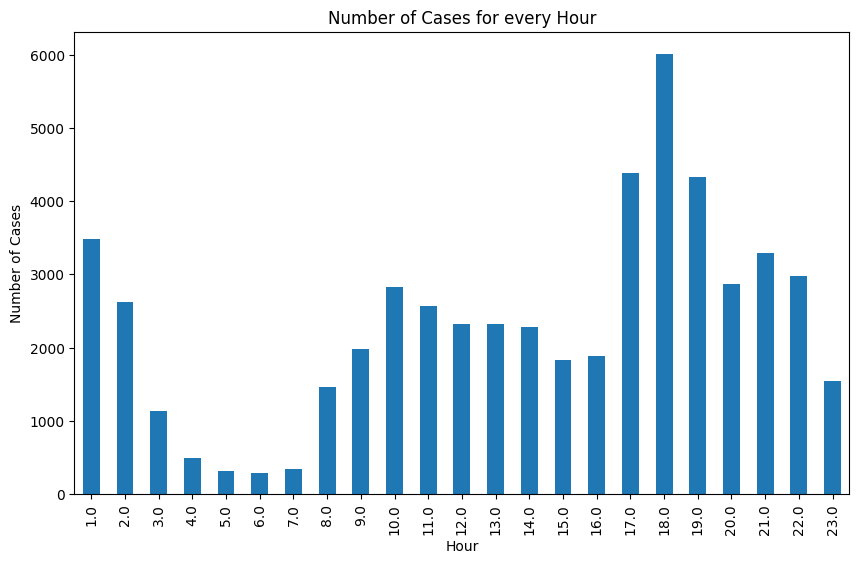

In [19]:
cases_per_hour = combined_data.groupby('hour').size()

# Plot the result
cases_per_hour.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cases for every Hour')
plt.ylabel('Number of Cases')
plt.xlabel('Hour')
plt.show()

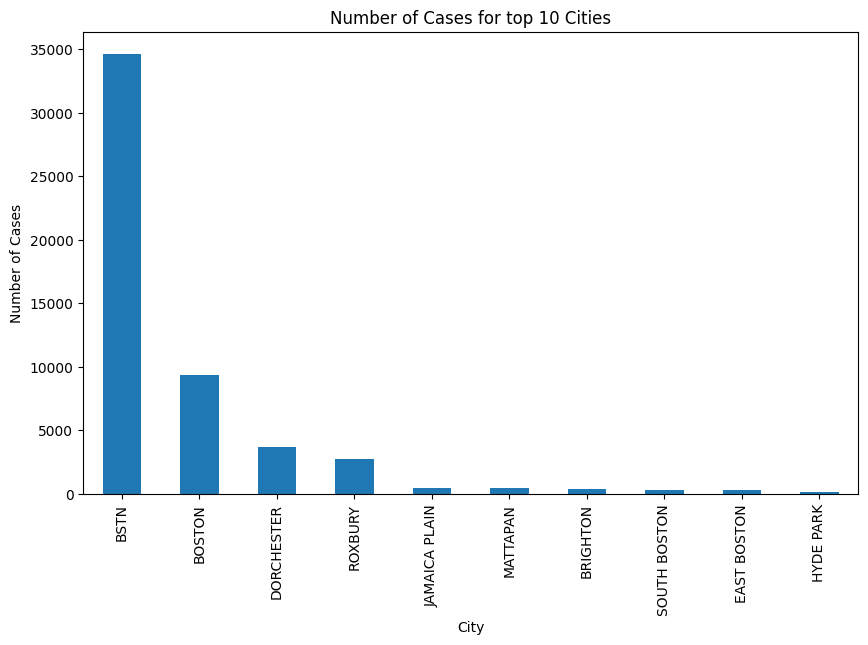

In [23]:
#top 10 cases per city
cases_per_city = combined_data.groupby('city').size().sort_values(ascending=False).head(10)

# Plot the result
cases_per_city.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cases for top 10 Cities')
plt.ylabel('Number of Cases')
plt.xlabel('City')
plt.show()
